**Table of contents**<a id='toc0_'></a>    
- [EDA](#toc1_)    
  - [Introduction](#toc1_1_)    
    - [The objective](#toc1_1_1_)    
    - [Research Questions](#toc1_1_2_)    
  - [Import packages](#toc1_2_)    
  - [Import dataset](#toc1_3_)    
  - [Data Summary](#toc1_4_)    
    - [How much are the size of train | test dataset?](#toc1_4_1_)    
    - [Summary table for Train | Test dataset](#toc1_4_2_)    
      - [Key finding:](#toc1_4_2_1_)    
    - [Which variables (columns) are in train | test dataset?](#toc1_4_3_)    
    - [Which data types of variables are within the train dataset?](#toc1_4_4_)    
      - [Key finding:](#toc1_4_4_1_)    
    - [How many numeric variables are within the train dataset?](#toc1_4_5_)    
    - [How many categorical variables are within the train dataset?](#toc1_4_6_)    
  - [Target Variable](#toc1_5_)    
      - [Correlation Level](#toc1_5_1_1_)    
  - [Data Exploration](#toc1_6_)    
    - [Univariate Analyis: Categorical Data](#toc1_6_1_)    
      - [Key Finidng:](#toc1_6_1_1_)    
    - [Univariate Analysis: Numeric variable](#toc1_6_2_)    
    - [Bivariable Analysis: Interaction between Categorical variable and target variable](#toc1_6_3_)    
    - [Bivariable Analysis: Interaction between Numerical variable and target variable](#toc1_6_4_)    
  - [Data Cleansing](#toc1_7_)    
    - [Remove duplicates](#toc1_7_1_)    
      - [Key Finding:](#toc1_7_1_1_)    
  - [Data Proprecessing](#toc1_8_)    
  - [Bureau.csv](#toc1_9_)    
  - [Summary](#toc1_10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[EDA](#toc0_)

## <a id='toc1_1_'></a>[Introduction](#toc0_)

### <a id='toc1_1_1_'></a>[The objective](#toc0_)

The objective of EDA notebook is to explore the dataset `application_{train|test}.csv`, which contains the list of application informations which are capable of repayment or not.

### <a id='toc1_1_2_'></a>[Research Questions](#toc0_)

- Explore the target variable in `application_{train|test}.csv`. Is the data unbalanced with respect to the target? What would the accuracy be for a simple model consisting in a majority class classifier?

- Explore the relationship between target and predictors, looking for potentially strong predictors that could be included later in a model.
The skimr package in R has some great data exploration tools, and the janitor package has utilities that will simplify data cleaning.

- Explore the scope of missing data in `application_{train|test}.csv` and come up with possible solutions. Remove rows?  Remove columns?  Impute?

- Be alert to problems in the data.  Do the values make sense? Are there mistaken values that should be cleaned or imputed? (Note that outliers are not necessarily mistakes. Check APM for advice on how to handle outliers for a predictive project.) Are there columns with near-zero or zero variance?

- Will the input data need to be transformed in order to be used in a model? You might answer this question differently for different models. (For example, some models might accept factor variables, others might not.) You can put off answering this question for now,  but you should begin thinking about it. Check APM for advice.

- Join `application_{train|test}.csv` with transactional data in, for example, `bureau.csv` or `previous_application.csv`. This will require aggregating the transactional data to have the same grain as the application data.

- Explore the joined transactional data.  Do some of the added columns show promise in predicting default?


## <a id='toc1_2_'></a>[Import packages](#toc0_)

In [16]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline

## <a id='toc1_3_'></a>[Import dataset](#toc0_)

In [17]:
# import train & test datasets
train = pd.read_csv('/Users/imdongchan/Documents/GitHub/MSBA/CapstoneProject/data/raw/application_train.csv', header = 0, sep = ',', index_col= 0)
test = pd.read_csv('/Users/imdongchan/Documents/GitHub/MSBA/CapstoneProject/data/raw/application_test.csv', header = 0, sep = ',', index_col= 0)

In [18]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

In [19]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cas

## <a id='toc1_4_'></a>[Data Summary](#toc0_)

### <a id='toc1_4_1_'></a>[How much are the size of train | test dataset?](#toc0_)

In [20]:
# size of train | test dataset
print(f"Size of application_train data: {train.shape}")
print(f"Size of application_test data: {test.shape}")

Size of application_train data: (307511, 121)
Size of application_test data: (48744, 120)


### <a id='toc1_4_2_'></a>[Summary table for Train | Test dataset](#toc0_)

In [21]:
# the feature & characteristics of train dataset
train.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TARGET,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,NaN,NaN,NaN,0.007,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,NaN,NaN,NaN,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,NaN,NaN,NaN,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,NaN,NaN,NaN,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [22]:
# # the feature & characteristics of test dataset
test.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
NAME_CONTRACT_TYPE,48744,2,Cash loans,48305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,48744,2,F,32678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,48744,2,N,32311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,48744,2,Y,33658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,48744.0,NaN,NaN,NaN,0.397054,0.709047,0.0,0.0,0.0,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,42695.0,NaN,NaN,NaN,0.001803,0.046132,0.0,0.0,0.0,0.0,2.0
AMT_REQ_CREDIT_BUREAU_WEEK,42695.0,NaN,NaN,NaN,0.002787,0.054037,0.0,0.0,0.0,0.0,2.0
AMT_REQ_CREDIT_BUREAU_MON,42695.0,NaN,NaN,NaN,0.009299,0.110924,0.0,0.0,0.0,0.0,6.0
AMT_REQ_CREDIT_BUREAU_QRT,42695.0,NaN,NaN,NaN,0.546902,0.693305,0.0,0.0,0.0,1.0,7.0


#### <a id='toc1_4_2_1_'></a>[Key finding:](#toc0_)
- Variables starting with `AMT_` are likely to have heavily left-skewed data distribution, which shows the 25%, 50%, 75% quartiles are  nearby 0.
- Variables starting with `FLAG_` can be encoded with 0 and 1, which would be helpful for the data modeling / ML modeling for future use.

### <a id='toc1_4_3_'></a>[Which variables (columns) are in train | test dataset?](#toc0_)

In [23]:
# train's columns
train.columns.values

array(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
  

In [24]:
# test's columns
test.columns.values

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASE

### <a id='toc1_4_4_'></a>[Which data types of variables are within the train dataset?](#toc0_)

In [25]:
train.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

#### <a id='toc1_4_4_1_'></a>[Key finding:](#toc0_)
Among 121 variables, Most of variables consists of Number format (65 + 40), whereas there are a few of object format variables (16) included in the train dataset.

### <a id='toc1_4_5_'></a>[How many numeric variables are within the train dataset?](#toc0_)

In [26]:
train.select_dtypes('number').columns.size

105

### <a id='toc1_4_6_'></a>[How many categorical variables are within the train dataset?](#toc0_)

In [27]:
train.select_dtypes('object').columns.size

16

## <a id='toc1_5_'></a>[Target Variable](#toc0_)

train['TARGET'] is described as below.
- 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
- 0 - all other cases

In [28]:
train['TARGET'].value_counts(normalize= True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

Majority class is 0, which indicates application doesn't have any problem with repayment abilities. Majority class classifier accurary accounts for `92%`. Overall, target variable is heavily (about 92%) in favor of 0 (clients without payment difficulties).

In [29]:
# create the function for visualizing the distribution of categorical data
def plot_cat_distribution(data, col):
    target = data[col].value_counts()
    df = pd.DataFrame({'labels': target.index,
                       'values': target.values
                      })
    plt.figure(figsize = (12,9))
    plt.title(f'{col} Distribution of [train dataset]')
    plt.xticks(rotation= 30)
    sns.barplot(x = 'labels', y= "values", data=df)
    sns.set_color_codes("pastel")
    locs, labels = plt.xticks()
    plt.show()


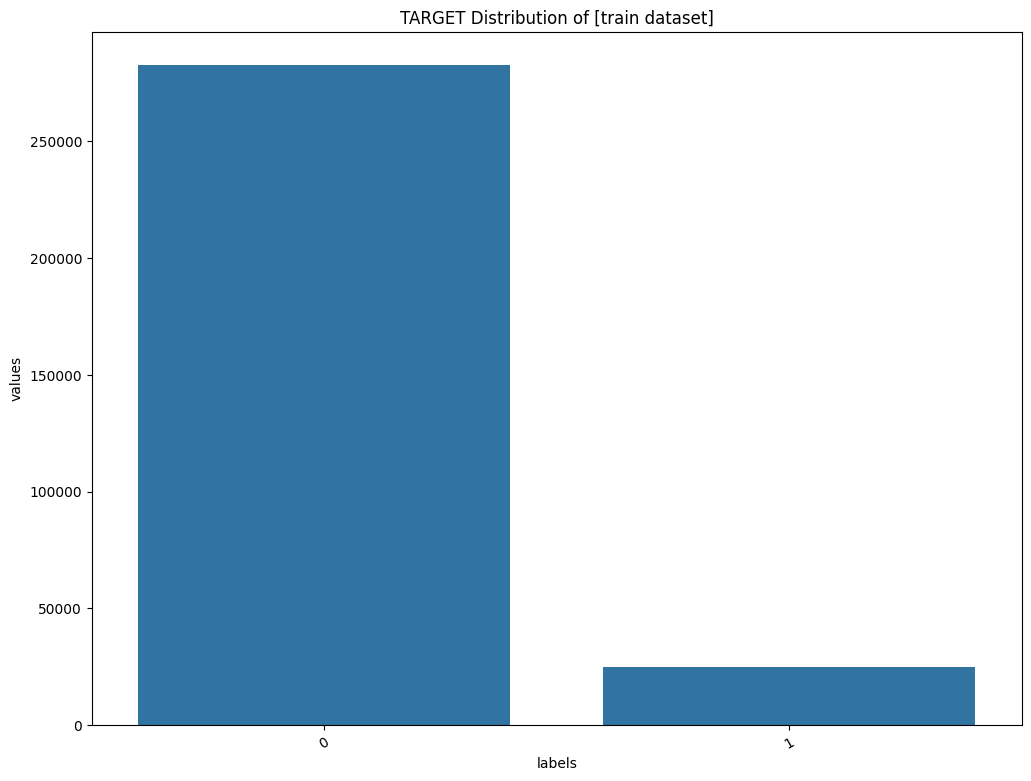

In [30]:
plot_cat_distribution(train, 'TARGET')

#### <a id='toc1_5_1_1_'></a>[Correlation Level](#toc0_)

- 0.00-0.19: Very weak
- 0.20-0.39: Weak
- 0.40-0.59: Moderate
- 0.60-0.79: Strong
- 0.80-1.0: Very strong

In [36]:
# Find TOP 10 correlated factors with TARGET variable.
train.corr(numeric_only= True)[['TARGET']].apply(abs).sort_values('TARGET', ascending= False).head(10)

,TARGET
TARGET,1.000000
EXT_SOURCE_3,0.178919
EXT_SOURCE_2,0.160472
EXT_SOURCE_1,0.155317
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994


## <a id='toc1_6_'></a>[Data Exploration](#toc0_)

### <a id='toc1_6_1_'></a>[Univariate Analyis: Categorical Data](#toc0_)

> How many levels exist per each of categorical variable in `train` dataset?

In [33]:
train.select_dtypes('object').nunique(axis = 0).sort_values(ascending= False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

#### <a id='toc1_6_1_1_'></a>[Key Finidng:](#toc0_)
- `ORGANIZATION_TYPE` has 58 categories as a factor, which would be needed to be reduced for modeling purpose.
- `OCCUPATION_TYPE` has 58 categories as a factor, which is second ranked variable followed by `ORGANIZATION_TYPE`

In [19]:
train['ORGANIZATION_TYPE'].value_counts(normalize= True)

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

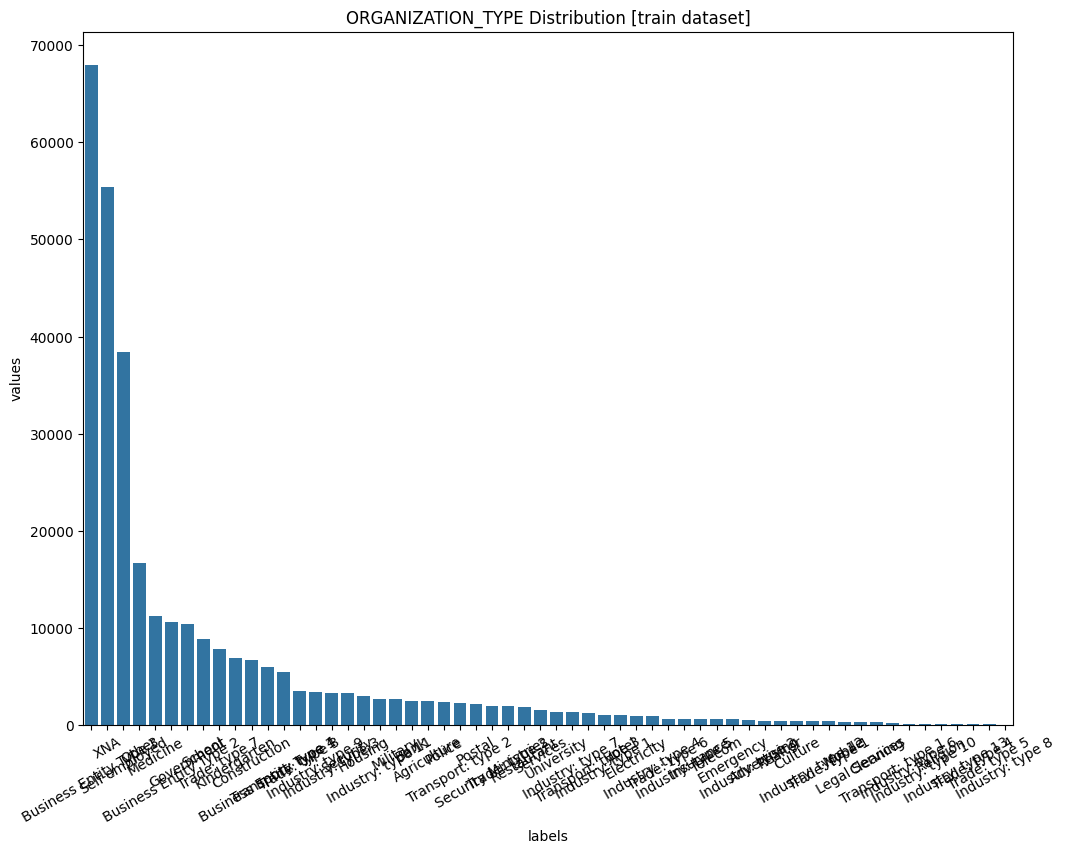

In [20]:
plot_cat_distribution(train, 'ORGANIZATION_TYPE')

In [21]:
train['OCCUPATION_TYPE'].value_counts(normalize= True)

OCCUPATION_TYPE
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: proportion, dtype: float64

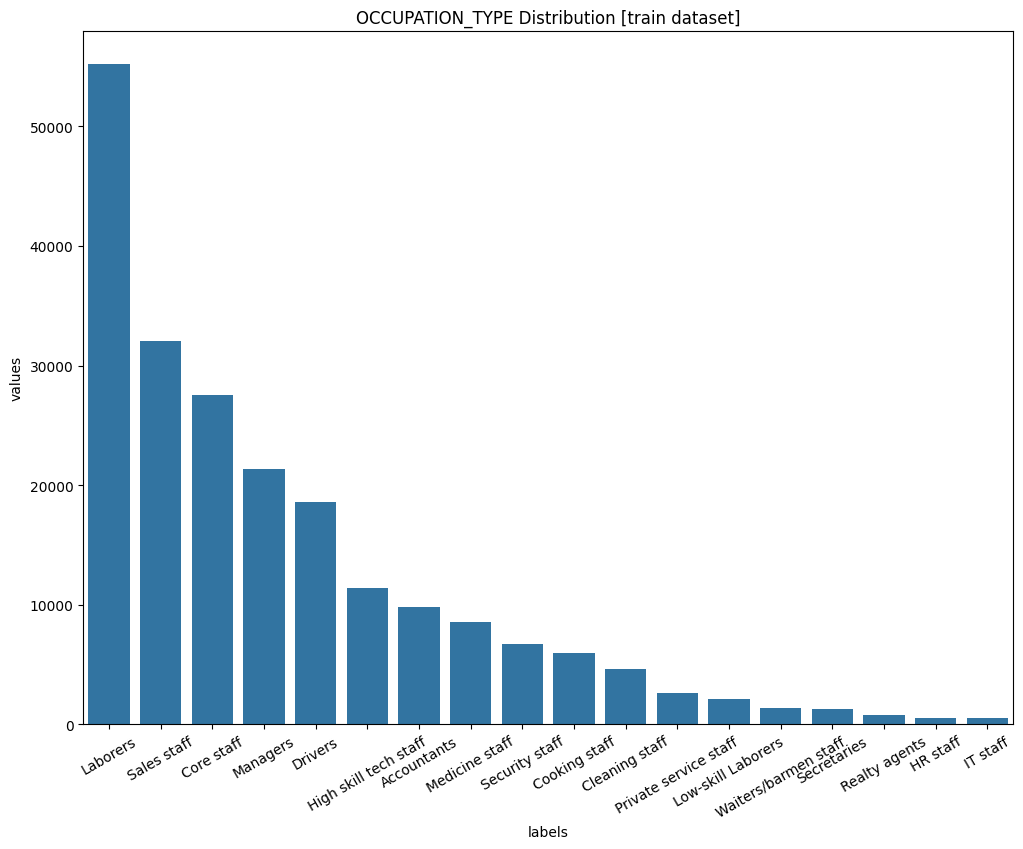

In [22]:
plot_cat_distribution(train, 'OCCUPATION_TYPE')

In [23]:
train['NAME_INCOME_TYPE'].value_counts(normalize= True)

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64

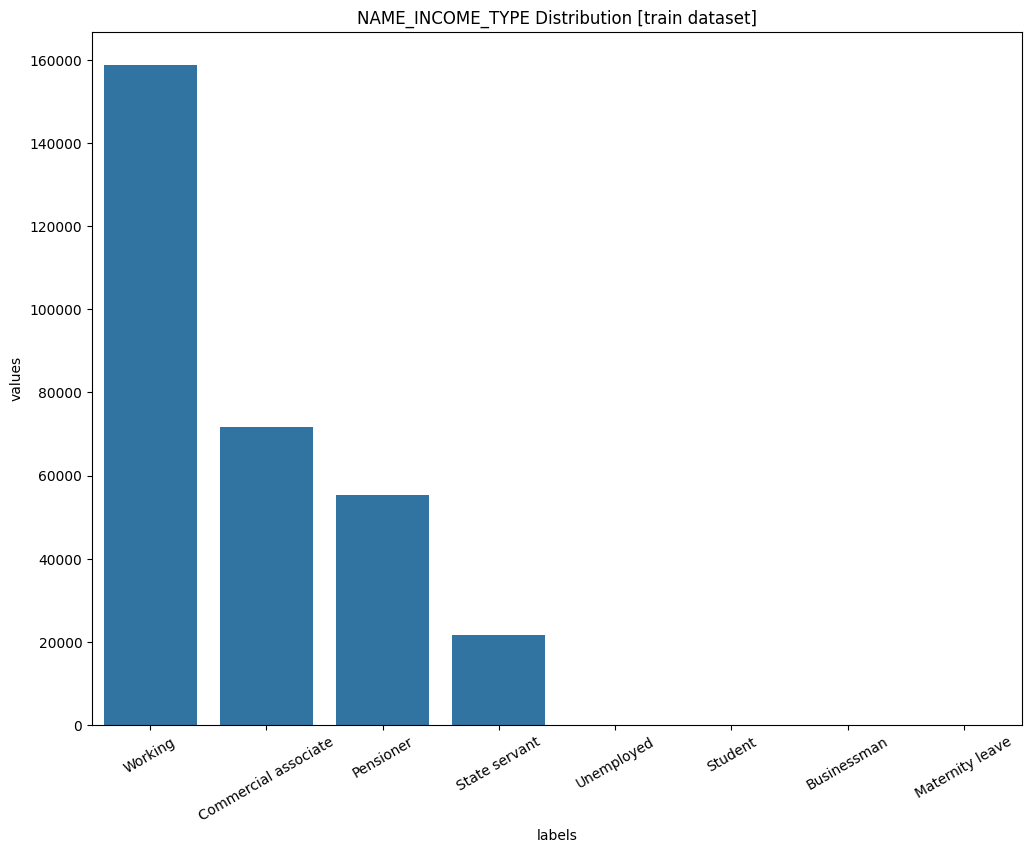

In [24]:
plot_cat_distribution(train, 'NAME_INCOME_TYPE')

### <a id='toc1_6_2_'></a>[Univariate Analysis: Numeric variable](#toc0_)

In [41]:
train.select_dtypes('number').columns.values

array(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', '

In [61]:
def plot_num_distribution(data, col):
    plt.figure(figsize=(6,9))
    plt.title(f"Distribution of {col}")
    ax = sns.distplot(data[col])
    plt.show()


In [62]:
def plot_num_boxplot(data, col):
    plt.figure(figsize=(6,9))
    plt.title(f"Boxplot of {col}")
    ax = sns.boxplot(x=data[col], orient='h')
    plt.show()

In [63]:
def plot_num_subplot(data, col):
    plt.figure(figsize=(24, 9))
    
    # 분포 플롯
    plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 위치에 서브 플롯 생성
    plt.title(f"{col}의 분포")
    sns.distplot(data[col])
    
    # 박스 플롯
    plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 위치에 서브 플롯 생성
    plt.title(f"{col}의 박스 플롯")
    sns.boxplot(x=data[col], orient='h')
    
    plt.show()

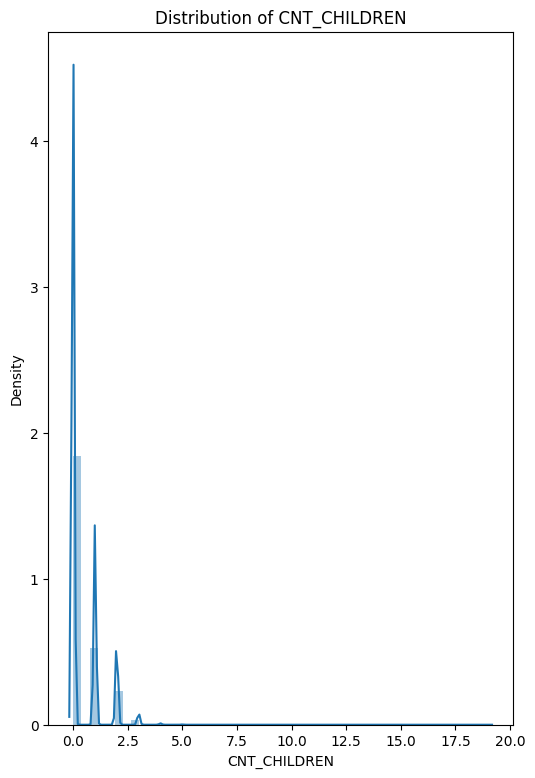

In [64]:
plot_num_distribution(train, 'CNT_CHILDREN')

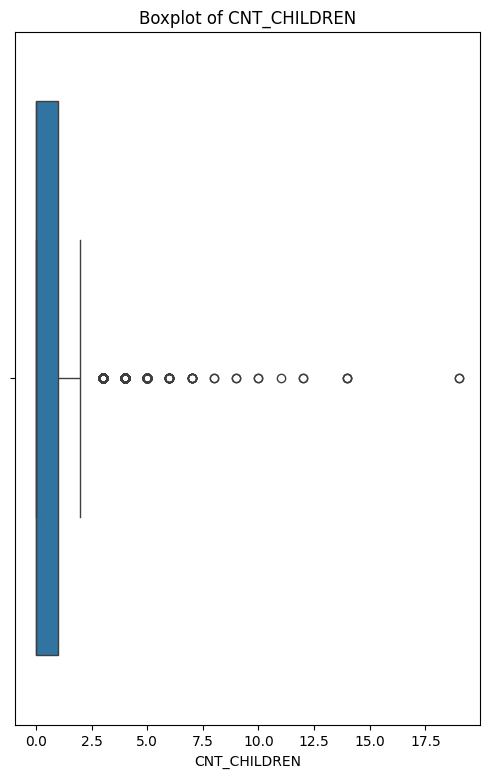

In [65]:
plot_num_boxplot(train, 'CNT_CHILDREN')

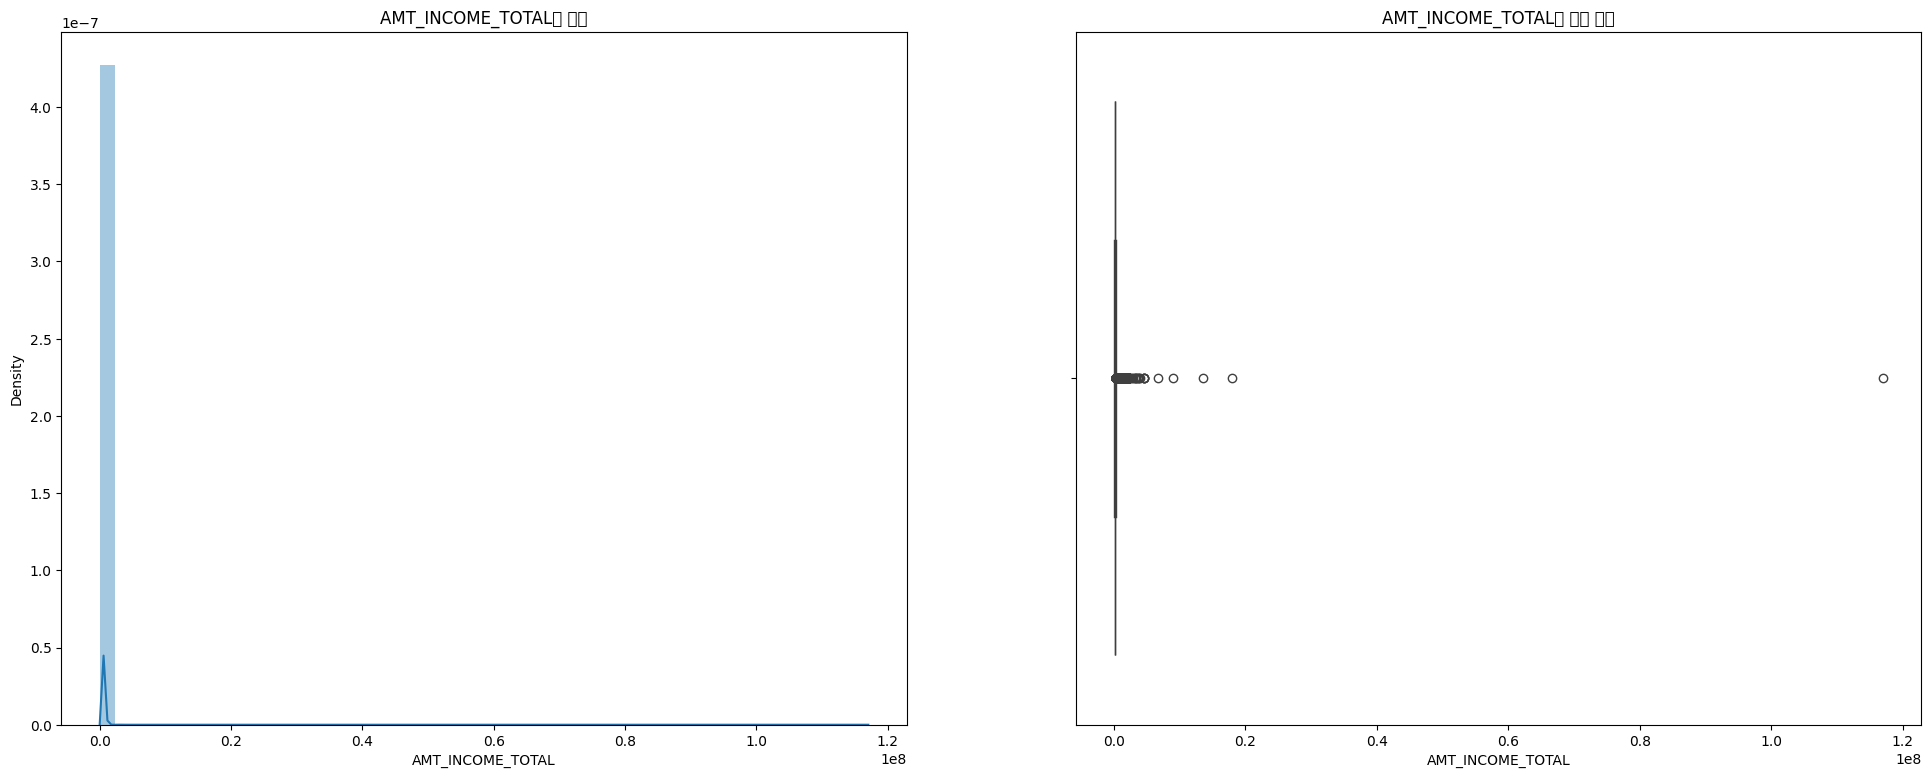

In [66]:
plot_num_subplot(train, 'AMT_INCOME_TOTAL')

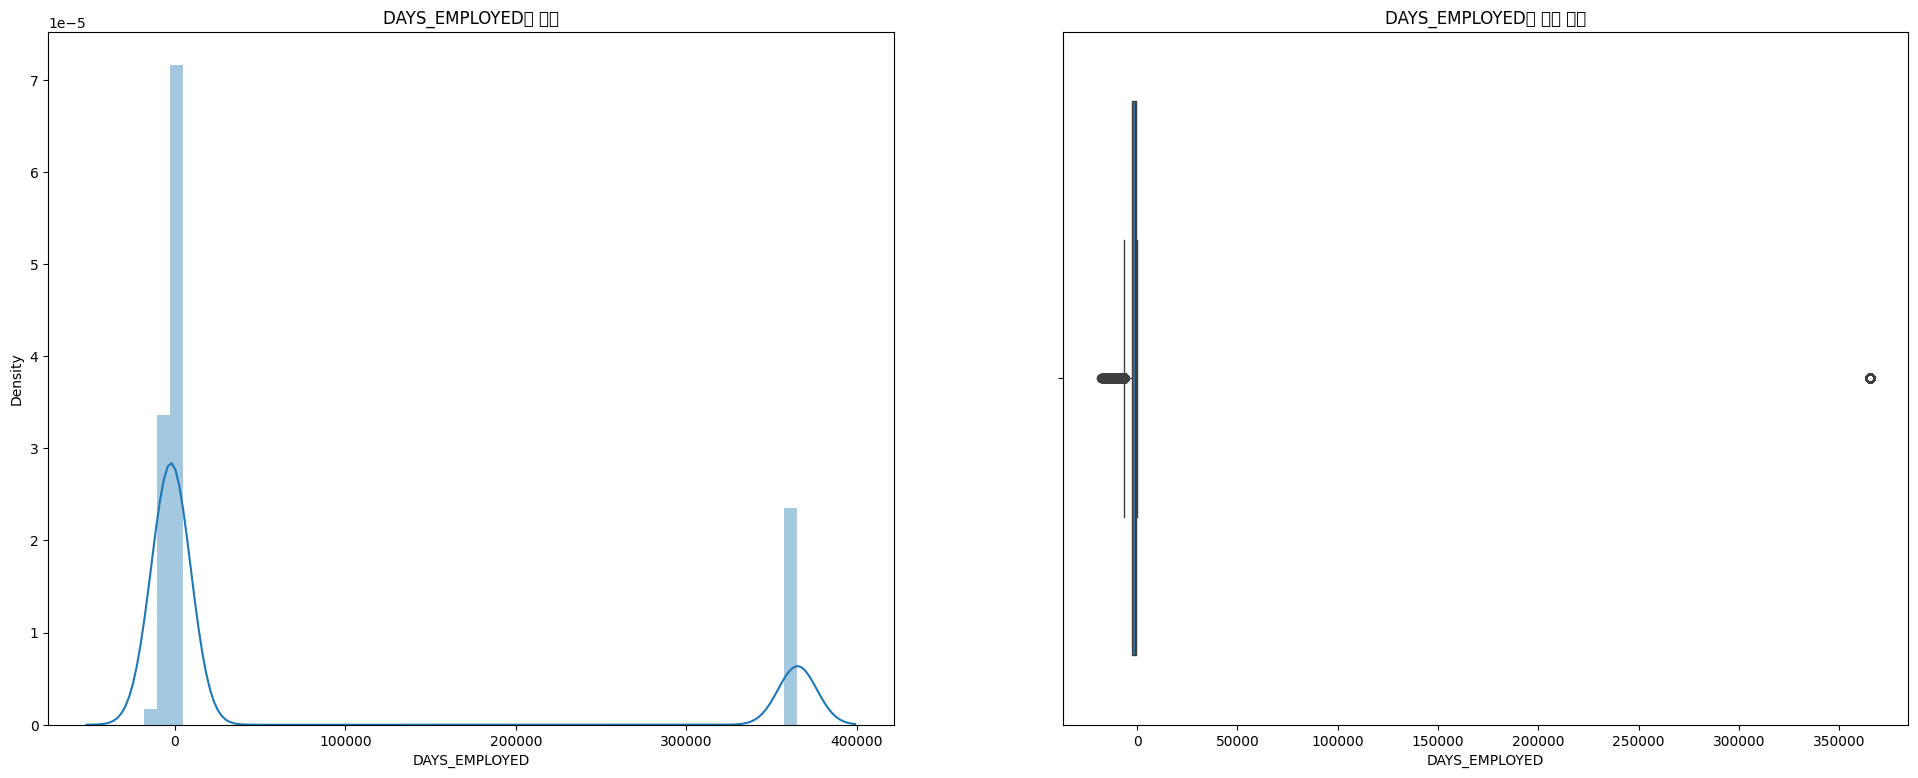

In [67]:
plot_num_subplot(train, 'DAYS_EMPLOYED')

### <a id='toc1_6_3_'></a>[Bivariable Analysis: Interaction between Categorical variable and target variable](#toc0_)

In [78]:
train.pivot_table(index='TARGET', columns='NAME_CONTRACT_TYPE', aggfunc='size', fill_value= 0)

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,255011,27675
1,23221,1604


### <a id='toc1_6_4_'></a>[Bivariable Analysis: Interaction between Numerical variable and target variable](#toc0_)

## <a id='toc1_7_'></a>[Data Cleansing](#toc0_)

There are mutiple data cleansing items to be implemented before modeling & evaluation processes.

- **Handle missing values**
This is one of the most common issues with real-world data. You can handle missing values in a few ways:

- **Drop rows with missing values**
Fill in missing values with the mean, median, or mode of the column
Fill in missing values with a constant value (like 0)
The approach you take depends on the nature of the data and your analysis goals.

- **Remove duplicates**
Duplicate rows can skew your analysis, so it’s important to identify and remove them. You can use pandas .duplicated() and .drop_duplicates() methods.

- **Check for outliers**
Outliers can significantly impact your results, so you’ll want to identify them and either remove them or handle them appropriately. You can use box plots, histograms, and z-scores to find outliers.

- **Correct data types**
Ensure all columns have the correct data type (string, integer, float, boolean, etc.). You may need to convert some columns using .astype().

- **Fix inconsistent data**
Look for inconsistencies in the data, like spelling variations, different formats, etc., and standardize the data.

- **Address class imbalance (if relevant)**
If you have a target variable with class imbalance, you may need to resample the data to get meaningful results.

- **Feature engineering**
Derive new features from your existing data that might be useful for your analysis. This is an important step for creating an effective model.

Those are the main steps for cleaning your data as part of the exploratory data analysis process.

### <a id='toc1_7_1_'></a>[Remove duplicates](#toc0_)
Duplicate rows can skew your analysis, so it’s important to identify and remove them. You can use pandas .duplicated() and .drop_duplicates() methods.

#### <a id='toc1_7_1_1_'></a>[Key Finding:](#toc0_)
There are no duplicated rows within train | test dataset.

In [ ]:
train.duplicated().value_counts()

False    307511
Name: count, dtype: int64

In [ ]:
test.duplicated().value_counts()

False    48744
Name: count, dtype: int64

**Handle missing values**
This is one of the most common issues with real-world data. You can handle missing values in a few ways:

In [48]:
temp = (train.isnull().sum() / len(train) * 100).sort_values(ascending= False)

train_missing_df = pd.DataFrame({'Column':temp.index, 'Prop':temp.values})
miss_50_train = train_missing_df[train_missing_df['Prop'] > 50]
miss_50_train

,Column,Prop
0,COMMONAREA_AVG,69.872297
1,COMMONAREA_MODE,69.872297
2,COMMONAREA_MEDI,69.872297
3,NONLIVINGAPARTMENTS_AVG,69.432963
4,NONLIVINGAPARTMENTS_MODE,69.432963
5,NONLIVINGAPARTMENTS_MEDI,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MEDI,68.354953
8,LIVINGAPARTMENTS_AVG,68.354953
9,LIVINGAPARTMENTS_MODE,68.354953


If more than 50% of your data is missing, this indicates that a significant amount of data cannot be analyzed.

In [49]:
temp = (test.isnull().sum() / len(test) * 100).sort_values(ascending= False)

test_missing_df = pd.DataFrame({'Column':temp.index, 'Prop':temp.values})
miss_50_test = test_missing_df[test_missing_df['Prop'] > 50]
miss_50_test

,Column,Prop
0,COMMONAREA_MODE,68.716150
1,COMMONAREA_AVG,68.716150
2,COMMONAREA_MEDI,68.716150
3,NONLIVINGAPARTMENTS_MEDI,68.412523
4,NONLIVINGAPARTMENTS_AVG,68.412523
5,NONLIVINGAPARTMENTS_MODE,68.412523
6,FONDKAPREMONT_MODE,67.284179
7,LIVINGAPARTMENTS_MEDI,67.249302
8,LIVINGAPARTMENTS_MODE,67.249302
9,LIVINGAPARTMENTS_AVG,67.249302


**Feature engineering**
Derive new features from your existing data that might be useful for your analysis. This is an important step for creating an effective model.

In [ ]:
train.loc[:,train.isin(['Y','N','Yes','No','yes','no']).all(axis= 0)]

,FLAG_OWN_CAR,FLAG_OWN_REALTY
SK_ID_CURR,,
100002,N,Y
100003,N,N
100004,Y,Y
100006,N,Y
100007,N,Y
...,...,...
456251,N,N
456252,N,Y
456253,N,Y


In [ ]:
# encode 'Y' with 1 and 'N' with 0
train.replace({'Y':1, 'N':0}, inplace = True)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.7295

## <a id='toc1_8_'></a>[Data Proprecessing](#toc0_)

**Feature engineering**
Derive new features from your existing data that might be useful for your analysis. This is an important step for creating an effective model.

it would be great to unify the timeframe unit into YEAR. All variables starting with 'DAYS` can be altered into 'YEARS' by applying some calculation.

In [38]:
train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [68]:
(train['DAYS_BIRTH']/ -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

<Axes: >

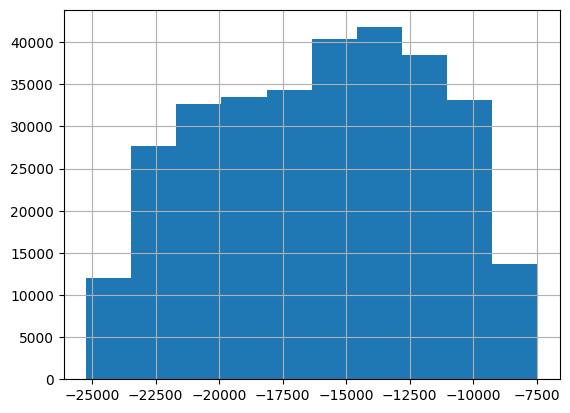

In [57]:
train['DAYS_BIRTH'].hist()

<Axes: >

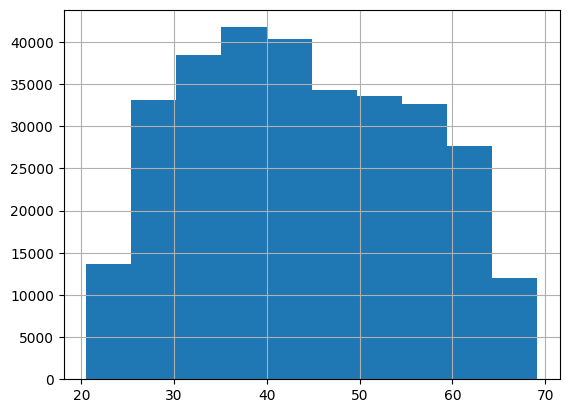

In [69]:
(train['DAYS_BIRTH']/ -365).hist()

In [ ]:
np.abs(train.loc[:, train.columns.str.startswith('DAYS')] / 365.0)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,,,,,
100002,25.920548,1.745205,9.994521,5.808219,3.106849
100003,45.931507,3.254795,3.249315,0.797260,2.268493
100004,52.180822,0.616438,11.671233,6.934247,2.232877
100006,52.068493,8.326027,26.939726,6.676712,1.690411
100007,54.608219,8.323288,11.810959,9.473973,3.030137
...,...,...,...,...,...
456251,25.553425,0.646575,23.167123,5.430137,0.747945
456252,56.917808,1000.665753,12.021918,11.205479,0.000000
456253,41.002740,21.701370,18.457534,14.109589,5.230137


I can find some abnormal data in 'DAYS_'variables, which shows that YEAR_EMPLOYED is over 1000 years.

## <a id='toc1_9_'></a>[Bureau.csv](#toc0_)

- **Table Definition**: Monthly balances of previous credits in Credit Bureau.
- **Table Description**: This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
- **Variable Description**:
    - __CREDIT_ACTIVE__ - Current status of a Loan - Closed/ Active (2 values)
    - __CREDIT_CURRENCY__ - Currency in which the transaction was executed - Currency1, Currency2, Currency3, Currency4 ( 4 values)
    - __CREDIT_DAY_OVERDUE__ - Number of overdue days
    - __CREDIT_TYPE__ - Consumer Credit, Credit card, Mortgage, Car loan, Microloan, Loan for working capital replemishment, Loan for Business development, Real estate loan, Unkown type of laon, Another type of loan. Cash loan, Loan for the purchase of equipment, Mobile operator loan, Interbank credit, Loan for purchase of shares ( 15 values )
    - __DAYS_CREDIT__ - Number of days ELAPSED since customer applied for CB credit with respect to current application
    - __DAYS_CREDIT_ENDDATE__ - Number of days the customer CREDIT is valid at the time of application 
    - __CREDIT_DAY_OVERDUE__ - Number of days the customer CREDIT is past the end date at the time of application
    - __AMT_CREDIT_SUM__ - Total available credit for a customer 
    - __AMT_CREDIT_SUM_DEBT__ - Total amount yet to be repayed 
    - __AMT_CREDIT_SUM_LIMIT__ - Current Credit that has been utilized 
    - __AMT_CREDIT_SUM_OVERDUE__ - Current credit payment that is overdue 
    - __CNT_CREDIT_PROLONG__ - How many times was the Credit date prolonged

In [ ]:
bureau = pd.read_csv('/Users/imdongchan/Documents/GitHub/MSBA/CapstoneProject/data/raw/bureau.csv', header = 0, sep = ',', index_col= 0)

In [ ]:
bureau[bureau.index == 215354]

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.00,NaN,0.0,Consumer credit,-131,NaN
215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN
215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN
215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN
215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.8,42103.80,0.00,0.0,Consumer credit,-22,NaN
215354,5714458,Closed,currency 1,-1872,0,-776.0,-1203.0,NaN,0,494550.0,0.00,0.00,0.0,Consumer credit,-696,NaN
215354,5714459,Closed,currency 1,-1734,0,-638.0,-1336.0,NaN,0,1084032.0,0.00,NaN,0.0,Car loan,-1336,NaN


There are multiple duplicated `SK_ID_CURR`in `bureau.csv`, which means that data should be preprocessed to match with same data grain with  `train` | `test` dataset before mergeing with them.

## <a id='toc1_10_'></a>[Summary](#toc0_)

- `Target` variables is heavily imbalanced, 92% of applications are qualified with repayment abilities
- `Train` data itself needs to be preprocessed before analysis since some of predictors have high proportion of missing values
